In [78]:
from astropy.table import Table
from matplotlib.colors import PowerNorm
import sys
sys.path.append('scripts/')
from chemevo import chem_evo_data


In [2]:
apogee = Table.read('/data/jls/Downloads/apogee_astroNN-DR16.fits')

In [35]:
selection = (apogee['FE_H_ERR']<0.2)&(apogee['LOGG']<3.5)&(apogee['dist']<3000.)&(np.abs(apogee['GALZ'])>1.)
print(np.count_nonzero(selection))

21965


/data/jls/python3.5/site-packages/astropy/table/column.py:991: RuntimeWarning: invalid value encountered in less
  result = getattr(super(), op)(other)
/data/jls/python3.5/site-packages/astropy/table/column.py:991: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


In [113]:
flS = chem_evo_data('/data/jls/out_tmp.hdf5')
ssS=np.argmin(np.abs(fl.R-8.3))
flO = chem_evo_data('/data/jls/chem_evo/results/mw_singlezone.hdf5')
ssO=np.argmin(np.abs(fl.R-8.3))
flM = chem_evo_data('/data/jls/chem_evo/results/mw_multizone.hdf5')
ssM=[np.argmin(np.abs(flM.R-radii)) for radii in [4.,8.,12.]]


['Ca', 'Fe', 'H', 'He', 'Mg', 'O', 'S', 'Si', 'alpha']
['Ca', 'Fe', 'H', 'He', 'Mg', 'O', 'S', 'Si', 'alpha']
['Ca', 'Fe', 'H', 'He', 'Mg', 'O', 'S', 'Si', 'alpha']


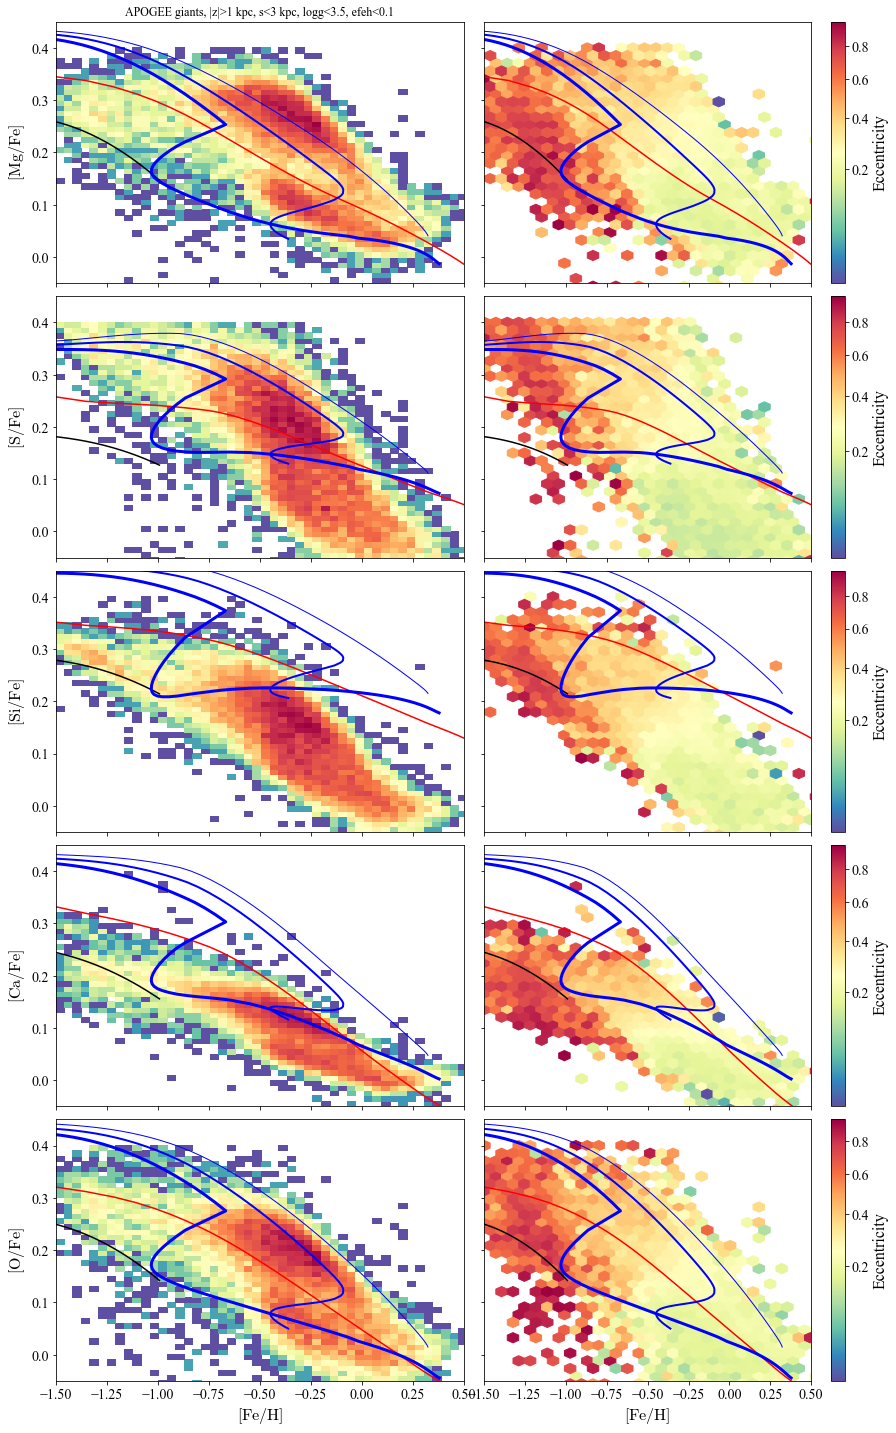

In [132]:
elements = ['Mg','S','Si','Ca','O']
f,ax=plt.subplots(5,2,figsize=[15.,25.],sharex=True,sharey=True)
plt.subplots_adjust(hspace=0.05,wspace=0.05)

for ii,e in enumerate(elements):
    a = ax[ii]
    for kk in range(2):
        plt.sca(a[kk])
        plt.plot(flO.abund['Fe'][ssO]-flO.abund['H'][ss],
                 (flO.abund[e]-flO.abund['Fe'])[ss]+0.15,c='r')
        plt.plot(flS.abund['Fe'][ssS]-flS.abund['H'][ssS],
                 (flS.abund[e]-flS.abund['Fe'])[ssS],c='k')
        [plt.plot(flM.abund['Fe'][ssm]-flM.abund['H'][ssm],
                 (flM.abund[e]-flM.abund['Fe'])[ssm]+0.15,c='b',lw=rr+1) for rr,ssm in enumerate(ssM)]
        if ii==len(ax)-1:
            plt.xlabel(r'$\mathrm{[Fe/H]}$')
        if kk==0:
            plt.ylabel(r'$\mathrm{[%s/Fe]}$'%e)
    
    plt.sca(a[0])
    if ii==0:
        plt.title('APOGEE giants, |z|>1 kpc, s<3 kpc, logg<3.5, efeh<0.1')
    plt.hist2d(apogee['FE_H'][selection],
               (apogee['%s_H'%e.upper()]-apogee['FE_H'])[selection],
              bins=50,range=[[-1.5,0.6],[-0.1,0.4]],norm=LogNorm(),cmap=plt.cm.Spectral_r);
    plt.sca(a[1])
    plt.hexbin(apogee['FE_H'][selection],
               (apogee['%s_H'%e.upper()]-apogee['FE_H'])[selection],
               C=apogee['e'][selection],
              gridsize=30,extent=[-1.5,0.6,-0.1,0.4],cmap=plt.cm.Spectral_r,norm=PowerNorm(.5));
    plt.colorbar(label='Eccentricity')
    plt.xlim(-1.5,0.5)
    plt.ylim(-0.05,0.45)

## Radial dependence

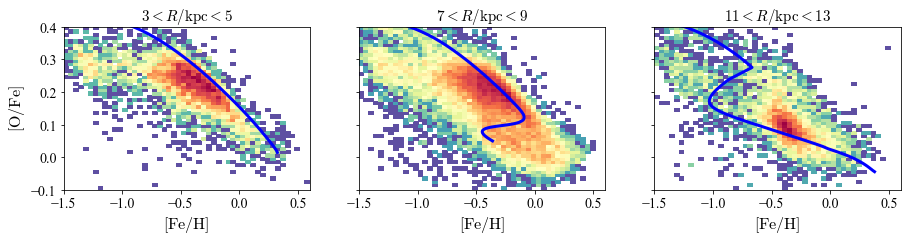

In [163]:
betw = lambda x,l,u: (x>l)&(x<u)
rranges = [[3,5],[7,9],[11,13]]
selectionR = [
        (apogee['FE_H_ERR']<0.2)&(apogee['LOGG']<3.5)&betw(apogee['GALR'],rd,ru)&(np.abs(apogee['GALZ'])>1) for rd,ru in rranges
]

f,a=plt.subplots(1,3,figsize=[15.,3.],sharex=True,sharey=True)
e='O'
for rr in range(3):
    plt.sca(a[rr])
    plt.plot(flM.abund['Fe'][ssM[rr]]-flM.abund['H'][ssM[rr]],
                 (flM.abund[e]-flM.abund['Fe'])[ssM[rr]]+0.15,c='b',lw=3)
    plt.hist2d(apogee['FE_H'][selectionR[rr]],
               (apogee['%s_H'%e.upper()]-apogee['FE_H'])[selectionR[rr]],
              bins=50,range=[[-1.5,0.6],[-0.1,0.4]],norm=LogNorm(),cmap=plt.cm.Spectral_r);
    plt.xlabel(r'$\mathrm{[Fe/H]}$')
    if rr==0:
        plt.ylabel(r'$\mathrm{[%s/Fe]}$'%e)
    plt.title('$%i<R/\mathrm{kpc}<%i$'%(rranges[rr][0],rranges[rr][1]),fontsize=15)